<a href="https://colab.research.google.com/github/nashitaerha/tugas-text-preprocessing-group-7/blob/main/Scrapping-Preprocessing-Group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scraping Data**

In [100]:
!pip install google-play-scraper

In [101]:
import pandas as pd
import numpy as np
from google_play_scraper import Sort, reviews, reviews_all

result, continuation_token = reviews(
    'com.intsig.camscanner',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=3000,
    filter_score_with=None
)

start_date = pd.Timestamp('2018-01-01')
end_date = pd.Timestamp('2024-11-09')
filtered_result = [
    review for review in result if start_date <= pd.Timestamp(review['at']) <= end_date
][:3000]

data = pd.DataFrame(np.array(filtered_result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
display(data)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d5e8defa-d83d-4239-89c3-2410ea9a322d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hasilnya bagus bgt...pdhl fotonya g pas tepat ...,5,35,6.74.0.2410250000,2024-11-01 14:43:19,None,NaT,6.74.0.2410250000
1,cdf96fca-37e4-430f-bf48-3c7166225f6c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Iklannya ga kira-kira kalo mau ngasih, ganggu ...",2,29,6.72.5.2409050000,2024-09-19 22:46:51,Please accept our apologies for the inconvenie...,2024-09-20 11:00:45,6.72.5.2409050000
2,76c1adfb-1177-45e0-9aa2-8e32a54acea8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat bagus... Dan mempermudah urusan dokumen...,5,252,6.71.0.2408140000,2024-09-06 13:27:15,None,NaT,6.71.0.2408140000
3,a66db2e3-7910-4eca-932b-a248c41217d1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"memudahkan dlm scan, hasilnya juga bagus.. min...",4,2,6.74.0.2410250000,2024-11-01 07:02:21,None,NaT,6.74.0.2410250000
4,00c267bc-2410-46aa-b4eb-ba7ae384356a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tiba tiba uang gw kepotong tanpa sepengetahuan...,1,3,6.74.0.2410250000,2024-11-02 12:32:22,The subscription won't be activated automatica...,2024-11-06 12:00:36,6.74.0.2410250000
...,...,...,...,...,...,...,...,...,...,...,...
2995,fdff653f-291d-4b4d-b806-86888c9a9af2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aku sih yes ini bagus buat dokumentasi apa aja...,5,0,5.40.0.20210402,2021-07-27 05:19:25,None,NaT,5.40.0.20210402
2996,b13b35dd-ffc5-4e14-a9cb-c5e1cd712d66,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk bagus gambar yang dihasilkan HD berkualita...,5,3,6.41.0.2305240000,2023-06-05 10:13:35,None,NaT,6.41.0.2305240000
2997,dc06088a-0b6d-4429-af05-354691344f7b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Memudahkan di saat mengirimkan scan nan hasil ...,4,0,5.13.0.20190924,2019-10-07 00:44:50,None,NaT,5.13.0.20190924
2998,6edfeb87-7ff7-4a41-9375-a8a04266e59e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Dari dulu suka,, hasil memuaskan sempat uninst...",5,0,5.16.5.20200112,2020-02-17 05:25:36,None,NaT,5.16.5.20200112


In [102]:
scrappeddata = data[['content','score','at']]
sorteddata = scrappeddata.sort_values(by='at', ascending=False)
display(sorteddata)

,content,score,at
137,Kalo fitur gratis nya masih aman gw kasih 5*,5,2024-11-08 14:02:06
102,Bagus seterusnya harus tingkat lagi yg menjadi...,5,2024-11-08 13:57:32
509,cepat jelas mantapp,5,2024-11-08 08:01:03
479,Jos ga pake trail dan free 3hari,5,2024-11-08 07:59:22
140,Banyak iklan sekaligus watermark mengganggu,2,2024-11-08 07:47:35
...,...,...,...
2104,"Best scanner free app..... mudah digunakan, sa...",5,2018-09-18 09:20:18
2770,"keren sih buat yang berhubungan sm admin , sca...",5,2018-09-17 08:04:47
689,Sangat membantu bilamana tidak ada scanner. Ha...,5,2018-09-16 13:17:04
2289,Sangat membantu utk pencatatan kegiatan di lap...,5,2018-09-16 03:31:08


In [103]:
df = sorteddata[['content','score']]

In [104]:
df.to_csv("review_cam_scanner.csv", index = False)

# **Pre-processing**

Removal of Emojis

In [105]:
import re
import emoji

def remove_emojis(text):
  text = emoji.replace_emoji(text, replace='')
  return text

df['content'] = df['content'].apply(lambda x: remove_emojis(x))
display(df)

<ipython-input-105-533b383c9e3a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: remove_emojis(x))


,content,score
137,Kalo fitur gratis nya masih aman gw kasih 5*,5
102,Bagus seterusnya harus tingkat lagi yg menjadi...,5
509,cepat jelas mantapp,5
479,Jos ga pake trail dan free 3hari,5
140,Banyak iklan sekaligus watermark mengganggu,2
...,...,...
2104,"Best scanner free app..... mudah digunakan, sa...",5
2770,"keren sih buat yang berhubungan sm admin , sca...",5
689,Sangat membantu bilamana tidak ada scanner. Ha...,5
2289,Sangat membantu utk pencatatan kegiatan di lap...,5


Lower Casing

In [106]:
df['content'] = df['content'].str.lower()
display(df)

<ipython-input-106-58b7edb656e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].str.lower()


,content,score
137,kalo fitur gratis nya masih aman gw kasih 5*,5
102,bagus seterusnya harus tingkat lagi yg menjadi...,5
509,cepat jelas mantapp,5
479,jos ga pake trail dan free 3hari,5
140,banyak iklan sekaligus watermark mengganggu,2
...,...,...
2104,"best scanner free app..... mudah digunakan, sa...",5
2770,"keren sih buat yang berhubungan sm admin , sca...",5
689,sangat membantu bilamana tidak ada scanner. ha...,5
2289,sangat membantu utk pencatatan kegiatan di lap...,5


Removal of Numbers

In [107]:
import re

def remove_numbers(text):
  return re.sub(r'\d+', '', text)

df['content'] = df['content'].apply(remove_numbers)
display(df)

<ipython-input-107-aa0b433a9cbe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(remove_numbers)


,content,score
137,kalo fitur gratis nya masih aman gw kasih *,5
102,bagus seterusnya harus tingkat lagi yg menjadi...,5
509,cepat jelas mantapp,5
479,jos ga pake trail dan free hari,5
140,banyak iklan sekaligus watermark mengganggu,2
...,...,...
2104,"best scanner free app..... mudah digunakan, sa...",5
2770,"keren sih buat yang berhubungan sm admin , sca...",5
689,sangat membantu bilamana tidak ada scanner. ha...,5
2289,sangat membantu utk pencatatan kegiatan di lap...,5


Removal of Emoticons

In [108]:
import re

EMOTICONS = {
    u":-\)":"Happy face or sm\ley",
    u":\)":"Happy face or smitéy",
    u":-D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8-D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":-\(":"Frown, sad, andry or pouting"}

def remove_emoticons(text):
    if not isinstance(text, (str, bytes)):
        text = str(text)
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

df['content'] = df['content'].apply(lambda text: remove_emoticons(text))
display(df)

<ipython-input-108-f108ffaac42c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda text: remove_emoticons(text))


,content,score
137,kalo fitur gratis nya masih aman gw kasih *,5
102,bagus seterusnya harus tingkat lagi yg menjadi...,5
509,cepat jelas mantapp,5
479,jos ga pake trail dan free hari,5
140,banyak iklan sekaligus watermark mengganggu,2
...,...,...
2104,"best scanner free app..... mudah digunakan, sa...",5
2770,"keren sih buat yang berhubungan sm admin , sca...",5
689,sangat membantu bilamana tidak ada scanner. ha...,5
2289,sangat membantu utk pencatatan kegiatan di lap...,5


Removal of Punctuations

In [109]:
import string

def remove_punctuations(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text

df['content'] = df['content'].apply(remove_punctuations)
display(df)

<ipython-input-109-07635e5da90c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(remove_punctuations)


,content,score
137,kalo fitur gratis nya masih aman gw kasih,5
102,bagus seterusnya harus tingkat lagi yg menjadi...,5
509,cepat jelas mantapp,5
479,jos ga pake trail dan free hari,5
140,banyak iklan sekaligus watermark mengganggu,2
...,...,...
2104,best scanner free app mudah digunakan sangat m...,5
2770,keren sih buat yang berhubungan sm admin scan...,5
689,sangat membantu bilamana tidak ada scanner han...,5
2289,sangat membantu utk pencatatan kegiatan di lap...,5


Removal of Stopwords

In [110]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
  stop_words = set(stopwords.words('indonesian'))
  return ' '.join([word for word in text.split() if word not in stop_words])

df['content'] = df['content'].apply(remove_stopwords)
display(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-110-55e5b8d3c439>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(remove_stopwords)


,content,score
137,kalo fitur gratis nya aman gw kasih,5
102,bagus tingkat yg,5
509,cepat mantapp,5
479,jos ga pake trail free,5
140,iklan watermark mengganggu,2
...,...,...
2104,best scanner free app mudah membantu pekerjaan...,5
2770,keren sih berhubungan sm admin scannya jd gampang,5
689,membantu bilamana scanner kesulitan pindahin k...,5
2289,membantu utk pencatatan kegiatan lapangan teri...,5


In [111]:
remove_words = [
    "wkwkw", "wkwkwkwkwk", "hahahaha", "mantap pak sikat", "kwkkwkw", "wkwk", "cuaks", "eh ehe", "hehehe",
    "wkwkwkwkwkwk", "wk", "awkwkwkwk", "honghong", "haha", "wkwkwkwk", "wkwkwk", "aahhhh", "xixixixi",
    "ckck", "awokwokwok", "hahah", "akwakwkawk", "ahahahaha", "clckckck", "ckckckck", "ttt", "ne", "ppp",
    "huhuha", "we", "ee", "nder", "nderr", "elaaaah", "loh", "nah", "hah", "ha", "woyyy", "woy", "cuy", "cuk", "kntl"
]

def remove_words_from_text(text, remove_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in remove_words]
    return ' '.join(filtered_words)

df['content'] = df['content'].apply(lambda x: remove_words_from_text(x, remove_words))
display(df)

<ipython-input-111-3f4b89a267e5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: remove_words_from_text(x, remove_words))


,content,score
137,kalo fitur gratis nya aman gw kasih,5
102,bagus tingkat yg,5
509,cepat mantapp,5
479,jos ga pake trail free,5
140,iklan watermark mengganggu,2
...,...,...
2104,best scanner free app mudah membantu pekerjaan...,5
2770,keren sih berhubungan sm admin scannya jd gampang,5
689,membantu bilamana scanner kesulitan pindahin k...,5
2289,membantu utk pencatatan kegiatan lapangan teri...,5


Removal of Frequent Words

In [112]:
from collections import Counter

cnt = Counter()
for text in df['content'].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common(20)

[('aplikasi', 1259),
 ('membantu', 910),
 ('bagus', 794),
 ('scan', 643),
 ('yg', 576),
 ('nya', 496),
 ('iklan', 427),
 ('mudah', 392),
 ('file', 381),
 ('banget', 378),
 ('pdf', 365),
 ('dokumen', 353),
 ('aplikasinya', 249),
 ('pekerjaan', 247),
 ('apk', 247),
 ('tugas', 245),
 ('hasil', 232),
 ('camscanner', 230),
 ('gak', 221),
 ('ga', 218)]

In [113]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(20)])

def remove_freqwords(text):
  return ' '.join([word for word in text.split() if word not in FREQWORDS])

df['content'] = df['content'].apply(remove_freqwords)
display(df)

<ipython-input-113-cbd37246c423>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(remove_freqwords)


,content,score
137,kalo fitur gratis aman gw kasih,5
102,tingkat,5
509,cepat mantapp,5
479,jos pake trail free,5
140,watermark mengganggu,2
...,...,...
2104,best scanner free app kantor,5
2770,keren sih berhubungan sm admin scannya jd gampang,5
689,bilamana scanner kesulitan pindahin komputer d...,5
2289,utk pencatatan kegiatan lapangan terima kasih ...,5


Slang Normalization

In [114]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk import word_tokenize

df_slang = pd.read_csv('kamusalay updated_1.csv', encoding='latin-1')
print(df_slang.columns)
dict_alay = df_slang.set_index('slang_word') ['formal'].to_dict()

def normalize_text(text):
  word_tokens = word_tokenize (text)
  result = [dict_alay.get(wt, wt) for wt in word_tokens]
  return ' '.join(result)

df['content'] = df['content'].apply(lambda text: normalize_text(text))
display(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Index(['slang_word', 'formal'], dtype='object')


<ipython-input-114-4fb03ddcb07f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda text: normalize_text(text))


,content,score
137,kalau fitur gratis aman gue kasih,5
102,tingkat,5
509,cepat mantap,5
479,hebat pakai trail free,5
140,watermark mengganggu,2
...,...,...
2104,best scanner free app kantor,5
2770,keren sih berhubungan sama admin scannya jadi ...,5
689,bilamana scanner kesulitan pindahin komputer u...,5
2289,untuk pencatatan kegiatan lapangan terima kasi...,5


## **Pelabelan**

In [115]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4:
    return 'Positif'
  elif score == 5:
    return 'Positif'

df['Label'] = df['score'].apply(pelabelan)
display(df)

,content,score,Label
137,kalau fitur gratis aman gue kasih,5,Positif
102,tingkat,5,Positif
509,cepat mantap,5,Positif
479,hebat pakai trail free,5,Positif
140,watermark mengganggu,2,Negatif
...,...,...,...
2104,best scanner free app kantor,5,Positif
2770,keren sih berhubungan sama admin scannya jadi ...,5,Positif
689,bilamana scanner kesulitan pindahin komputer u...,5,Positif
2289,untuk pencatatan kegiatan lapangan terima kasi...,5,Positif


## **Tokenizing**

In [116]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['content_tokenized'] = df['content'].astype(str).apply(regexp.tokenize)
display(df)

,content,score,Label,content_tokenized
137,kalau fitur gratis aman gue kasih,5,Positif,"[kalau, fitur, gratis, aman, gue, kasih]"
102,tingkat,5,Positif,[tingkat]
509,cepat mantap,5,Positif,"[cepat, mantap]"
479,hebat pakai trail free,5,Positif,"[hebat, pakai, trail, free]"
140,watermark mengganggu,2,Negatif,"[watermark, mengganggu]"
...,...,...,...,...
2104,best scanner free app kantor,5,Positif,"[best, scanner, free, app, kantor]"
2770,keren sih berhubungan sama admin scannya jadi ...,5,Positif,"[keren, sih, berhubungan, sama, admin, scannya..."
689,bilamana scanner kesulitan pindahin komputer u...,5,Positif,"[bilamana, scanner, kesulitan, pindahin, kompu..."
2289,untuk pencatatan kegiatan lapangan terima kasi...,5,Positif,"[untuk, pencatatan, kegiatan, lapangan, terima..."


## **Stemming**

In [117]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['content_stemmed'] = df['content_tokenized'].apply(lambda x: [stemmer.stem(y) for y in x])
display(df)

,content,score,Label,content_tokenized,content_stemmed
137,kalau fitur gratis aman gue kasih,5,Positif,"[kalau, fitur, gratis, aman, gue, kasih]","[kalau, fitur, gratis, aman, gue, kasih]"
102,tingkat,5,Positif,[tingkat],[tingkat]
509,cepat mantap,5,Positif,"[cepat, mantap]","[cepat, mantap]"
479,hebat pakai trail free,5,Positif,"[hebat, pakai, trail, free]","[hebat, pakai, trail, free]"
140,watermark mengganggu,2,Negatif,"[watermark, mengganggu]","[watermark, ganggu]"
...,...,...,...,...,...
2104,best scanner free app kantor,5,Positif,"[best, scanner, free, app, kantor]","[best, scanner, free, app, kantor]"
2770,keren sih berhubungan sama admin scannya jadi ...,5,Positif,"[keren, sih, berhubungan, sama, admin, scannya...","[keren, sih, hubung, sama, admin, scannya, jad..."
689,bilamana scanner kesulitan pindahin komputer u...,5,Positif,"[bilamana, scanner, kesulitan, pindahin, kompu...","[bilamana, scanner, sulit, pindahin, komputer,..."
2289,untuk pencatatan kegiatan lapangan terima kasi...,5,Positif,"[untuk, pencatatan, kegiatan, lapangan, terima...","[untuk, catat, giat, lapang, terima, kasih, lo..."


In [118]:
df['clean_review'] = df['content_stemmed'].apply(lambda x: ' '.join(x) if isinstance(x, list) else ' '.join([str(x)]))
display(df)

,content,score,Label,content_tokenized,content_stemmed,clean_review
137,kalau fitur gratis aman gue kasih,5,Positif,"[kalau, fitur, gratis, aman, gue, kasih]","[kalau, fitur, gratis, aman, gue, kasih]",kalau fitur gratis aman gue kasih
102,tingkat,5,Positif,[tingkat],[tingkat],tingkat
509,cepat mantap,5,Positif,"[cepat, mantap]","[cepat, mantap]",cepat mantap
479,hebat pakai trail free,5,Positif,"[hebat, pakai, trail, free]","[hebat, pakai, trail, free]",hebat pakai trail free
140,watermark mengganggu,2,Negatif,"[watermark, mengganggu]","[watermark, ganggu]",watermark ganggu
...,...,...,...,...,...,...
2104,best scanner free app kantor,5,Positif,"[best, scanner, free, app, kantor]","[best, scanner, free, app, kantor]",best scanner free app kantor
2770,keren sih berhubungan sama admin scannya jadi ...,5,Positif,"[keren, sih, berhubungan, sama, admin, scannya...","[keren, sih, hubung, sama, admin, scannya, jad...",keren sih hubung sama admin scannya jadi gampang
689,bilamana scanner kesulitan pindahin komputer u...,5,Positif,"[bilamana, scanner, kesulitan, pindahin, kompu...","[bilamana, scanner, sulit, pindahin, komputer,...",bilamana scanner sulit pindahin komputer unduh...
2289,untuk pencatatan kegiatan lapangan terima kasi...,5,Positif,"[untuk, pencatatan, kegiatan, lapangan, terima...","[untuk, catat, giat, lapang, terima, kasih, lo...",untuk catat giat lapang terima kasih love it s...


In [119]:
df.to_csv("clean_review.csv", index = False)

# **Feature Engineering**

In [120]:
df = df[['clean_review']]

One Hot Encoding

In [122]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = df['clean_review'].astype(str).tolist()

vectorizer = CountVectorizer(binary=True)
one_hot_encoded = vectorizer.fit_transform(corpus)

encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=vectorizer.get_feature_names_out())

df_one_hot = pd.concat([df, encoded_df], axis=1)
display(df_one_hot)

,clean_review,aaaaaa,aaamiiin,aaplks,abad,abal,absenfotojd,acara,account,acrobat,...,youtub,youtube,yrus,ys,yugas,yuk,zaman,zhira,zip,zoom
137,kalau fitur gratis aman gue kasih,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,tingkat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
509,cepat mantap,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,hebat pakai trail free,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,watermark ganggu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,best scanner free app kantor,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2770,keren sih hubung sama admin scannya jadi gampang,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
689,bilamana scanner sulit pindahin komputer unduh...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2289,untuk catat giat lapang terima kasih love it s...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Bag of Words

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = df['clean_review'].astype(str).tolist()

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(corpus)

encoded_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

df_bow = pd.concat([df, encoded_df], axis=1)
display(df_bow)

,clean_review,aaaaaa,aaamiiin,aaplks,abad,abal,absenfotojd,acara,account,acrobat,...,youtub,youtube,yrus,ys,yugas,yuk,zaman,zhira,zip,zoom
137,kalau fitur gratis aman gue kasih,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,tingkat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
509,cepat mantap,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,hebat pakai trail free,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,watermark ganggu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,best scanner free app kantor,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2770,keren sih hubung sama admin scannya jadi gampang,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
689,bilamana scanner sulit pindahin komputer unduh...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2289,untuk catat giat lapang terima kasih love it s...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TFIDF

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df['clean_review'].astype(str).tolist()

vectorizer = TfidfVectorizer()
tfidf_encoded = vectorizer.fit_transform(corpus)

encoded_df = pd.DataFrame(tfidf_encoded.toarray(), columns=vectorizer.get_feature_names_out())

df_tfidf = pd.concat([df, encoded_df], axis=1)
display(df_tfidf)

,clean_review,aaaaaa,aaamiiin,aaplks,abad,abal,absenfotojd,acara,account,acrobat,...,youtub,youtube,yrus,ys,yugas,yuk,zaman,zhira,zip,zoom
137,kalau fitur gratis aman gue kasih,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,tingkat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,cepat mantap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479,hebat pakai trail free,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,watermark ganggu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,best scanner free app kantor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2770,keren sih hubung sama admin scannya jadi gampang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
689,bilamana scanner sulit pindahin komputer unduh...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2289,untuk catat giat lapang terima kasih love it s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


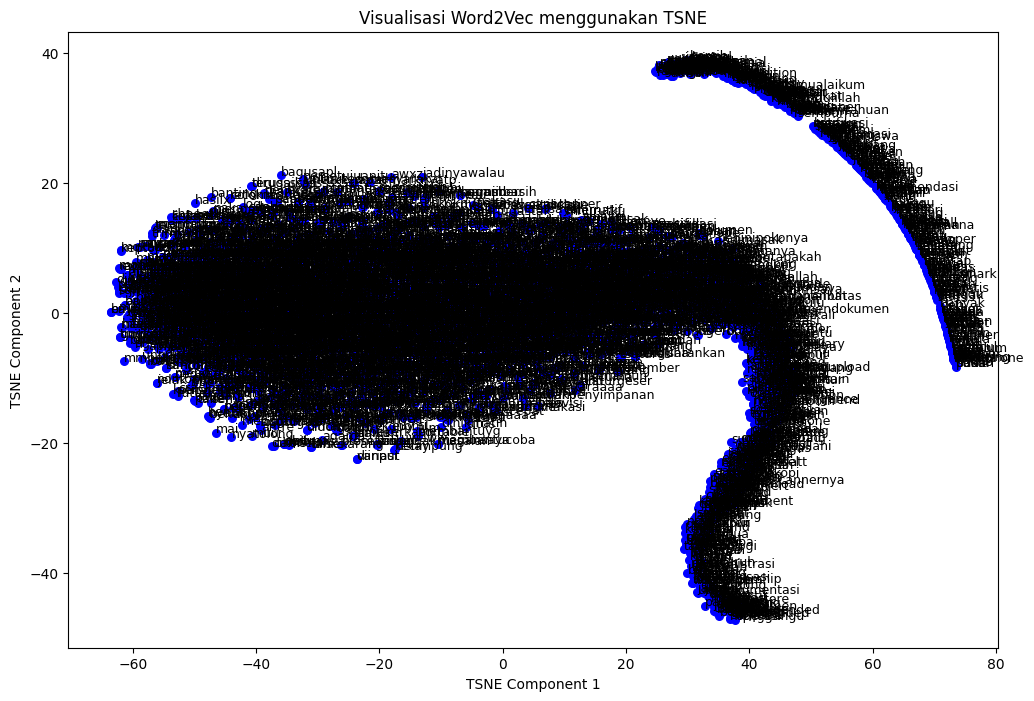

In [128]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

nltk.download('punkt')

corpus = df['clean_review'].astype(str).tolist()
tokenized_corpus = [word_tokenize(sentence) for sentence in corpus]

model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

word_vectors = model.wv
words = list(word_vectors.index_to_key)

tsne = TSNE(n_components=2, random_state=0)
word_vecs_2d = tsne.fit_transform(word_vectors[words])

plt.figure(figsize=(12, 8))
plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1], marker='o', color='blue', s=30)

for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vecs_2d[i, 0], word_vecs_2d[i, 1]), fontsize=9)

plt.title("Visualisasi Word2Vec menggunakan TSNE")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()